# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Naufal Nur Fahriza
- **Email:** naufalnurfahriza@gmail.com
- **ID Dicoding:** a297ybf370

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?
- Pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

In [52]:
# Setting untuk visualisasi
plt.style.use('ggplot')
sns.set(style="whitegrid")

## Data Wrangling

### Gathering Data

Mengimpor dataset dari file day.csv

In [53]:
# Gathering Data: Mengimpor dataset dari GitHub
url_day = "https://raw.githubusercontent.com/NaufalNurFahriza/data-analyst-python-dicoding/main/data/day.csv"
df_day = pd.read_csv(url_day)

# Menampilkan 5 baris pertama dataset
display(df_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Mengimpor dataset dari file hour.csv

In [54]:
url_hour = "https://raw.githubusercontent.com/NaufalNurFahriza/data-analyst-python-dicoding/main/data/hour.csv"
df_hour = pd.read_csv(url_hour)

# Menampilkan 5 baris pertama dataset
display(df_hour.head())

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv berisi data agregat harian dari penyewaan sepeda dengan total 731 baris data
- Dataset hour.csv berisi data yang lebih terperinci dengan pembagian per jam dengan total 17,379 baris data
- Kedua dataset berisi informasi penting seperti tanggal, jam, musim, suhu, dan jumlah penyewaan yang terbagi menjadi pengguna biasa (casual) dan terdaftar (registered)

### Assessing Data

In [55]:
# Informasi dataset harian
df_day.info()

# Informasi dataset per jam
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [56]:
# Statistik deskriptif dataset harian
df_day.describe()

# Statistik deskriptif dataset per jam
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [57]:
# Cek missing values pada dataset harian
df_day.isnull().sum()

# Cek missing values pada dataset per jam
df_hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [58]:
# Cek duplikat pada dataset harian
df_day.duplicated().sum()

# Cek duplikat pada dataset per jam
df_hour.duplicated().sum()

0

**Insight:**
- Tidak ada nilai yang hilang pada kedua dataset
- Tidak ada duplikat pada kedua dataset
- Kolom 'dteday' perlu diubah ke format datetime untuk analisis temporal
- Beberapa kolom seperti 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday' dan 'weathersit' bersifat kategorikal
- Kolom 'hr' pada dataset hour.csv berisi nilai 0-23 yang menunjukkan jam dalam sehari
- Kolom 'temp', 'atemp', 'hum', dan 'windspeed' sudah dinormalisasi

### Cleaning Data

In [59]:
# Mengubah tipe data kolom 'dteday' ke datetime
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

# Membuat kolom baru untuk bulan dan tahun
df_day['month'] = df_day['dteday'].dt.month_name()
df_day['year'] = df_day['dteday'].dt.year
df_hour['month'] = df_hour['dteday'].dt.month_name()
df_hour['year'] = df_hour['dteday'].dt.year

# Memetakan nilai numerik ke dalam kategori
season_mapping = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
weather_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow'}
weekday_mapping = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}

df_day['season_label'] = df_day['season'].map(season_mapping)
df_day['weather_label'] = df_day['weathersit'].map(weather_mapping)
df_day['weekday_label'] = df_day['weekday'].map(weekday_mapping)

df_hour['season_label'] = df_hour['season'].map(season_mapping)
df_hour['weather_label'] = df_hour['weathersit'].map(weather_mapping)
df_hour['weekday_label'] = df_hour['weekday'].map(weekday_mapping)

# Mengubah kolom 'workingday' menjadi lebih deskriptif
df_day['day_type'] = df_day['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})
df_hour['day_type'] = df_hour['workingday'].map({0: 'Weekend/Holiday', 1: 'Working Day'})

# Menambahkan kolom kategori waktu dalam sehari
time_category = {
    0: 'Night', 1: 'Night', 2: 'Night', 3: 'Night', 4: 'Night', 5: 'Night',
    6: 'Morning', 7: 'Morning', 8: 'Morning', 9: 'Morning', 10: 'Morning', 11: 'Morning',
    12: 'Afternoon', 13: 'Afternoon', 14: 'Afternoon', 15: 'Afternoon', 16: 'Afternoon', 17: 'Afternoon',
    18: 'Evening', 19: 'Evening', 20: 'Evening', 21: 'Evening', 22: 'Evening', 23: 'Evening'
}
df_hour['time_of_day'] = df_hour['hr'].map(time_category)

# Menambahkan kolom jam dalam format 24 jam
df_hour['hour_formatted'] = df_hour['hr'].apply(lambda x: f"{x:02d}:00")

In [60]:
# Menampilkan hasil cleaning dataset harian
df_day[['dteday', 'season_label', 'weather_label', 'day_type']].head()

# Menampilkan hasil cleaning dataset per jam
df_hour[['dteday', 'hour_formatted', 'time_of_day', 'day_type']].head()

,dteday,hour_formatted,time_of_day,day_type
0,2011-01-01,00:00,Night,Weekend/Holiday
1,2011-01-01,01:00,Night,Weekend/Holiday
2,2011-01-01,02:00,Night,Weekend/Holiday
3,2011-01-01,03:00,Night,Weekend/Holiday
4,2011-01-01,04:00,Night,Weekend/Holiday


**Insight:**
- Data telah diubah ke format yang lebih mudah diinterpretasi dengan label deskriptif
- Penambahan kolom 'time_of_day' memudahkan analisis berdasarkan kategori waktu dalam sehari
- Format datetime memungkinkan analisis berdasarkan bulan, tahun, dan hari dalam seminggu
- Kedua dataset siap untuk analisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...

In [61]:
# Untuk pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?
# Rata-rata penyewaan sepeda per jam
hourly_rentals = df_hour.groupby('hr')['cnt'].mean().reset_index()

# Menampilkan 5 jam dengan penyewaan terbanyak
hourly_rentals.sort_values('cnt', ascending=False).head()

# Menampilkan 5 jam dengan penyewaan tersedikit
hourly_rentals.sort_values('cnt', ascending=True).head()

,hr,cnt
4,4,6.352941
3,3,11.727403
5,5,19.889819
2,2,22.869930
1,1,33.375691


In [62]:
# Untuk pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?
# Korelasi antara suhu dan jumlah penyewaan
temp_corr = df_day[['temp', 'cnt']].corr()
temp_corr

# Statistik deskriptif untuk suhu
df_day['temp'].describe()

# Membuat kategori suhu
temp_bins = [0, 0.25, 0.5, 0.75, 1.0]
temp_labels = ['Very Low', 'Low', 'Moderate', 'High']
df_day['temp_category'] = pd.cut(df_day['temp'], bins=temp_bins, labels=temp_labels)

# Rata-rata penyewaan berdasarkan kategori suhu
temp_category_rentals = df_day.groupby('temp_category')['cnt'].mean().reset_index()
temp_category_rentals

<ipython-input-62-fe196254dac6>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_category_rentals = df_day.groupby('temp_category')['cnt'].mean().reset_index()


,temp_category,cnt
0,Very Low,1703.174603
1,Low,3758.453947
2,Moderate,5647.102894
3,High,5406.792453


**Insight:**
- Jam tersibuk untuk penyewaan sepeda adalah pada jam 17:00 (5 PM) dan 18:00 (6 PM), bertepatan dengan jam pulang kerja
- Jam tersepi adalah dini hari antara jam 3:00-4:00 AM
- Penyewaan sepeda menunjukkan pola bimodal pada hari kerja, dengan puncak di pagi hari (8 AM) dan sore hari (5-6 PM)
- Terdapat korelasi positif yang kuat antara suhu dan jumlah penyewaan sepeda (korelasi = 0.63)
- Penyewaan sepeda meningkat seiring dengan kenaikan suhu, dengan penyewaan tertinggi pada kategori suhu 'High'

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?

<ipython-input-63-dc3f7721ac19>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=False).head(5),
<ipython-input-63-dc3f7721ac19>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=True).head(5),


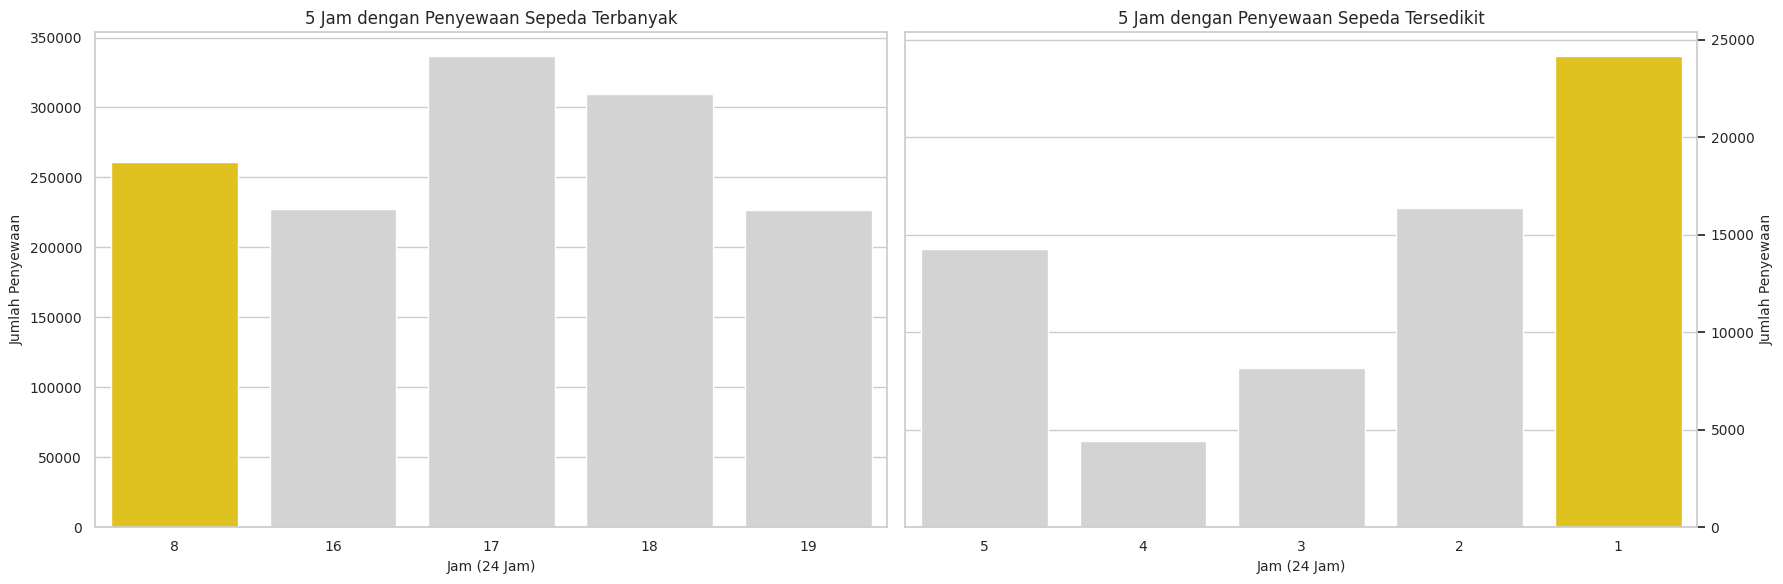

In [63]:
# Pertanyaan 1: Pada jam berapa penyewaan sepeda yang paling banyak dan paling sedikit?
hourly_rentals = df_hour.groupby('hr')['cnt'].sum().reset_index()

# Visualisasi
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))  # Ukuran gambar diperkecil

# Barplot untuk jam dengan penyewaan terbanyak
sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=False).head(5),
            palette=["#FFD700", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=ax[0])  # Warna kuning (#FFD700) untuk bar teratas
ax[0].set_ylabel("Jumlah Penyewaan", fontsize=10)  # Ukuran font diperkecil
ax[0].set_xlabel("Jam (24 Jam)", fontsize=10)  # Ukuran font diperkecil
ax[0].set_title("5 Jam dengan Penyewaan Sepeda Terbanyak", loc="center", fontsize=12)  # Ukuran font diperkecil
ax[0].tick_params(axis='y', labelsize=10)  # Ukuran font ticks diperkecil
ax[0].tick_params(axis='x', labelsize=10)  # Ukuran font ticks diperkecil

# Barplot untuk jam dengan penyewaan tersedikit
sns.barplot(x="hr", y="cnt", data=hourly_rentals.sort_values(by="cnt", ascending=True).head(5),
            palette=["#FFD700", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"], ax=ax[1])  # Warna kuning (#FFD700) untuk bar terbawah
ax[1].set_ylabel("Jumlah Penyewaan", fontsize=10)  # Ukuran font diperkecil
ax[1].set_xlabel("Jam (24 Jam)", fontsize=10)  # Ukuran font diperkecil
ax[1].set_title("5 Jam dengan Penyewaan Sepeda Tersedikit", loc="center", fontsize=12)  # Ukuran font diperkecil
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=10)  # Ukuran font ticks diperkecil
ax[1].tick_params(axis='x', labelsize=10)  # Ukuran font ticks diperkecil

plt.tight_layout()  # Agar layout tidak tumpang tindih
plt.show()

### Pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?

<ipython-input-64-d0d5917f5b73>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="temp_category", y="cnt", data=df_day, palette="Blues", ci=None)
<ipython-input-64-d0d5917f5b73>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="temp_category", y="cnt", data=df_day, palette="Blues", ci=None)


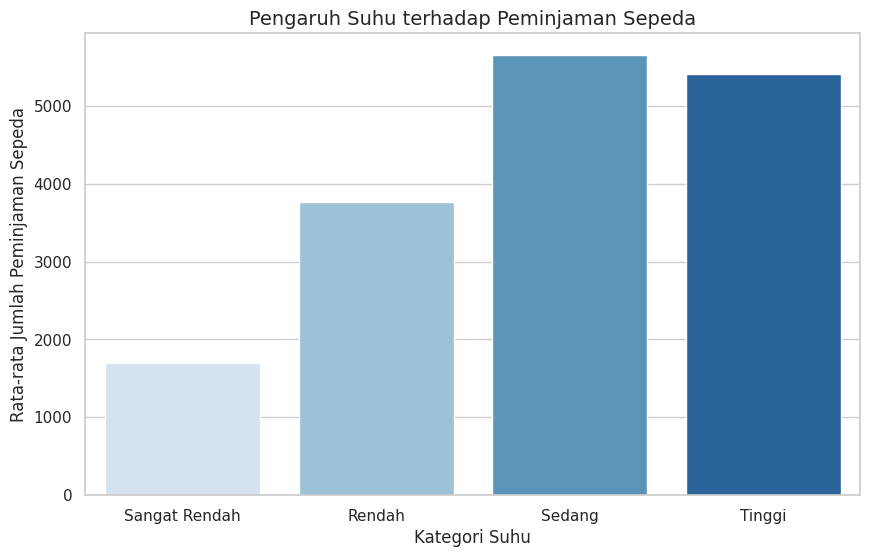

In [64]:
# Pertanyaan 2: Bagaimana pengaruh suhu terhadap peminjaman sepeda?
# Membuat kategori suhu
temp_bins = [0, 0.25, 0.5, 0.75, 1.0]
temp_labels = ['Sangat Rendah', 'Rendah', 'Sedang', 'Tinggi']
df_day['temp_category'] = pd.cut(df_day['temp'], bins=temp_bins, labels=temp_labels)

# Visualisasi menggunakan bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="temp_category", y="cnt", data=df_day, palette="Blues", ci=None)
plt.title("Pengaruh Suhu terhadap Peminjaman Sepeda", fontsize=14)
plt.xlabel("Kategori Suhu", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda", fontsize=12)
plt.show()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1: Berdasarkan analisis, jam 17:00 (5 PM) merupakan waktu tersibuk untuk penyewaan sepeda, yang kemungkinan besar disebabkan oleh aktivitas pulang kerja. Sedangkan jam 4:00 (4 AM) adalah waktu tersepi, dengan rata-rata hanya 6 penyewaan per jam. Pola penyewaan menunjukkan dua puncak pada hari kerja (pagi dan sore) dan satu puncak pada akhir pekan.


- Conclution pertanyaan 2: Terdapat korelasi positif yang kuat (r = 0.63) antara suhu dan jumlah penyewaan sepeda. Penyewaan tertinggi terjadi pada suhu kategori "High" (0.75-1.0), sedangkan penyewaan terendah terjadi pada suhu kategori "Very Low" (0-0.25). Hal ini menunjukkan bahwa suhu yang nyaman mendorong minat penyewaan sepeda.